<a href="https://colab.research.google.com/github/phuongghj123/CS114.K21/blob/master/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Lấy dữ liệu từ link google drive được cung cấp trong bài tập LAB-07 sử dụng thư viện PyDrive, google.colab, oauth2client**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Lấy các file cần thiết tải về google colab

In [ ]:
downloaded = drive.CreateFile({'id':"1NJzCpdwCL9bTDD3wl6FJkNLhYVBB4-9z"})
downloaded.GetContentFile('MBq-aOehEeiaxBKyA9PBAg_30681ac0e7a111e8bebc0104e43381c0_house_images.zip')

In [ ]:
downloaded = drive.CreateFile({'id':"1pn4pHOYFDkw3Q-evJCp86oZNg0ujVcih"})
downloaded.GetContentFile('2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip')

# **2. Cài đặt thư viện turicreate**

In [ ]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 111kB/s 
     |████████████████████████████████| 86.3MB 94kB/s 
     |████████████████████████████████| 3.4MB 39.9MB/s 
     |████████████████████████████████| 327kB 49.1MB/s 
     |████████████████████████████████| 450kB 37.2MB/s 
     |████████████████████████████████| 3.8MB 42.9MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=687d2db4e75ae2de020ca6571cc62b136be2f4bbd990a42ee951f3a4e9779fdf
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4901f12ace1e70a66de8948ace552b517936a9cf51944941b6f076b38831da93
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  F

Thêm thư viện  turicreate

In [ ]:
import turicreate

# **3. Tạo thư mục data trong ổ đĩa ảo của google colab để chứa dữ liệu home_data.sframe**

Tạo thư mục data sử dụng lệnh mkdir

In [ ]:
!mkdir data

Hiển thị danh sách các file và thư mục có trong ổ đĩa ảo hiện thời của google colab

In [ ]:
!ls

2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip
adc.json
data
MBq-aOehEeiaxBKyA9PBAg_30681ac0e7a111e8bebc0104e43381c0_house_images.zip
sample_data


Giải nén file 2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip vào thư mục data

In [ ]:
!unzip 2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip -d data

Archive:  2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip
   creating: data/home_data.sframe/
  inflating: data/home_data.sframe/m_1ce96d9d245ca490.0000  
   creating: data/__MACOSX/
   creating: data/__MACOSX/home_data.sframe/
  inflating: data/__MACOSX/home_data.sframe/._m_1ce96d9d245ca490.0000  
  inflating: data/home_data.sframe/dir_archive.ini  
  inflating: data/__MACOSX/home_data.sframe/._dir_archive.ini  
  inflating: data/home_data.sframe/m_1ce96d9d245ca490.frame_idx  
  inflating: data/__MACOSX/home_data.sframe/._m_1ce96d9d245ca490.frame_idx  
 extracting: data/home_data.sframe/objects.bin  
  inflating: data/__MACOSX/home_data.sframe/._objects.bin  
  inflating: data/home_data.sframe/m_1ce96d9d245ca490.sidx  
  inflating: data/__MACOSX/home_data.sframe/._m_1ce96d9d245ca490.sidx  
  inflating: data/__MACOSX/._home_data.sframe  


Hiển thị thông tin bên trong thư mục home_data.sframe

In [ ]:
!ls /content/data/home_data.sframe/

dir_archive.ini		 m_1ce96d9d245ca490.frame_idx  objects.bin
m_1ce96d9d245ca490.0000  m_1ce96d9d245ca490.sidx


# **4. Hiển thị dữ liệu mua bán nhà đất**

Sử dụng turicreate.SFrame để lấy dữ liệu từ thư mục home_data.sframe lưu vào biến "sales"


In [ ]:
sales = turicreate.SFrame('/content/data/home_data.sframe/')

Dữ liệu gồm có 21613 hàng và 21 cột

Trong đó các cột hiển thị thông tin về ngôi nhà như giá, số lượng các loại phòng, diện tích,...

In [ ]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# **5. Khai phá dữ liệu**

Sử dụng lệnh sales.show() để trực quan hóa dữ liệu theo từng cột trong SFrame

In [ ]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

Biểu diễn mối liên hệ giữa feature "sqft_living" và "price" với 2 biến X và Y tương ứng, hiển thị dữ liệu từ hàng 1 tới 4999

In [ ]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

Model regression đơn giản dự đoán giá nhà theo diện tích (tính theo đơn vị feet^2)

Chia dữ liệu một cách ngẫu nhiêu các hàng của một SFrame thành 2 SFrames, cụ thể ở đây là "training_set" và "test_set" với tỉ lệ training_set/test_set = 80/20

In [ ]:
training_set, test_set = sales.random_split(.8,seed=0)

Train model regression đơn giản: Train model với dữ liệu lấy từ SFrame "training_set", sử dụng feature "sqft_living" dự đoán đầu ra là "price"

In [ ]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.003645     | 4347896.777784     | 1858647.542713       | 264118.524140                   | 239556.452245                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

Đánh giá chất lượng của một model

Giá trị trung bình của các giá trị "price" trong bộ test_set 

In [ ]:
print (test_set['price'].mean())

543054.0425632533


Đánh giá model thông qua giá trị max_error và rmse

Trong đó:

max_error là giá trị tuyệt đối của sai số lớn nhất giữa giá trị thực sự và giá trị dự đoán

rmse (Root-mean-squared-error): Độ lệch trung bình bình phương gốc


In [ ]:
print (sqft_model.evaluate(test_set))

{'max_error': 4142341.1082330598, 'rmse': 255200.027474669}


Explore model a little further

In ra các hệ số tương quan của model

In [ ]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47806.12126262975,5062.1146905207
sqft_living,None,282.15015298580084,2.22228205238106


Chấm xanh: biểu diễn mối liên hệ giữa sqft_living và price trong test_set

Đường thẳng màu đỏ: biểu diễn mối liên hệ giữa sqft_living và giá trị price dự đoán được trong bộ test_set

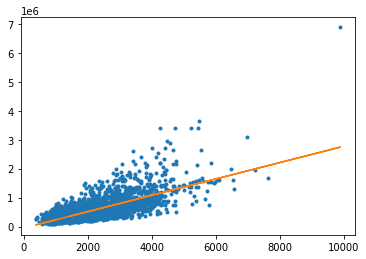

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

Khai phá thêm các feature khác

In [ ]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [ ]:
sales[my_features].show()

Materializing SFrame

Xây dựng model với các features được thêm vào

In [ ]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.031598     | 4073924.564460     | 2117091.152617       | 188652.738739                   | 200194.251507                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

So sánh model đơn giản với model phức tạp hơn

In [ ]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


So sánh với model cũ, model mới có nhiều feature hơn nên dự đoán chính xác hơn, vì giá trị max_error ở model mới giảm so với model cũ (3148111.43 < 4142341.11)

In [ ]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4142341.1082330598, 'rmse': 255200.027474669}
{'max_error': 3148111.434490856, 'rmse': 180501.78806068245}


Áp dụng model đã học vào dự đoán

In [ ]:
house1 = sales[sales['id']=='5309101200']

In [ ]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [ ]:
print (house1['price'])

[620000.0, ... ]


In [ ]:
print (sqft_model.predict(house1))

[629354.2459032923]


In [ ]:
print (my_features_model.predict(house1))

[730297.1638513468]


Dự đoán cho ngôi nhà thứ 2

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [ ]:
print (sqft_model.predict(house2))

[1261370.5885914862]


In [ ]:
print (my_features_model.predict(house2))

[1234583.5299229226]


Dự đoán cho một ngôi nhà đặc biệt hơn

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [ ]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15056107.02928958]
